In [1]:
import pandas as pd
import ccxt
from datetime import datetime, timezone
from concurrent.futures import ThreadPoolExecutor


In [2]:
async def async_fetch_ohlcv(exchange: ccxt.Exchange, symbol: str, timeframe: str, since: int, limit: int):
    ohlcv = exchange.fetch_ohlcv(symbol=symbol, timeframe=timeframe, since=since, limit=limit)

    return ohlcv

def fetch_binance_ohlcv(symbole: str, timeframe: str, since: int, until: int) -> pd.DataFrame:
    binance = ccxt.binance()
    since_arr = [i for i in range(since, until, 1000*1000)]

    with ThreadPoolExecutor() as executor:
        all_prices = executor.map(lambda since: binance.fetch_ohlcv(symbol=symbole, timeframe=timeframe, since=since, limit=1000), since_arr)

    all_prices = [price for prices in all_prices for price in prices]

    return all_prices

In [3]:
all_prices = fetch_binance_ohlcv('USDC/USDT', '1s', int(datetime(2024, 1, 1, tzinfo=timezone.utc).timestamp() * 1000), int(datetime(2024, 11, 28, tzinfo=timezone.utc).timestamp() * 1000))

In [4]:
df = pd.DataFrame(all_prices, columns=['time', 'open', 'high', 'low', 'close', 'volume'])
df["price"] = (df["open"] + df["close"]) / 2
df["time"] = df["time"]//1000
df = df.set_index('time')
df = df.drop(columns=['open', 'high', 'low', 'close', 'volume'])
df.head()

,price
time,
1704067200,1.00025
1704067201,1.00020
1704067202,1.00020
1704067203,1.00025
1704067204,1.00030


In [5]:
df.to_csv('USDCUSDT-2024_1s.csv')

In [6]:
df = pd.read_csv('USDCUSDT-2024_1s.csv')

<Axes: >

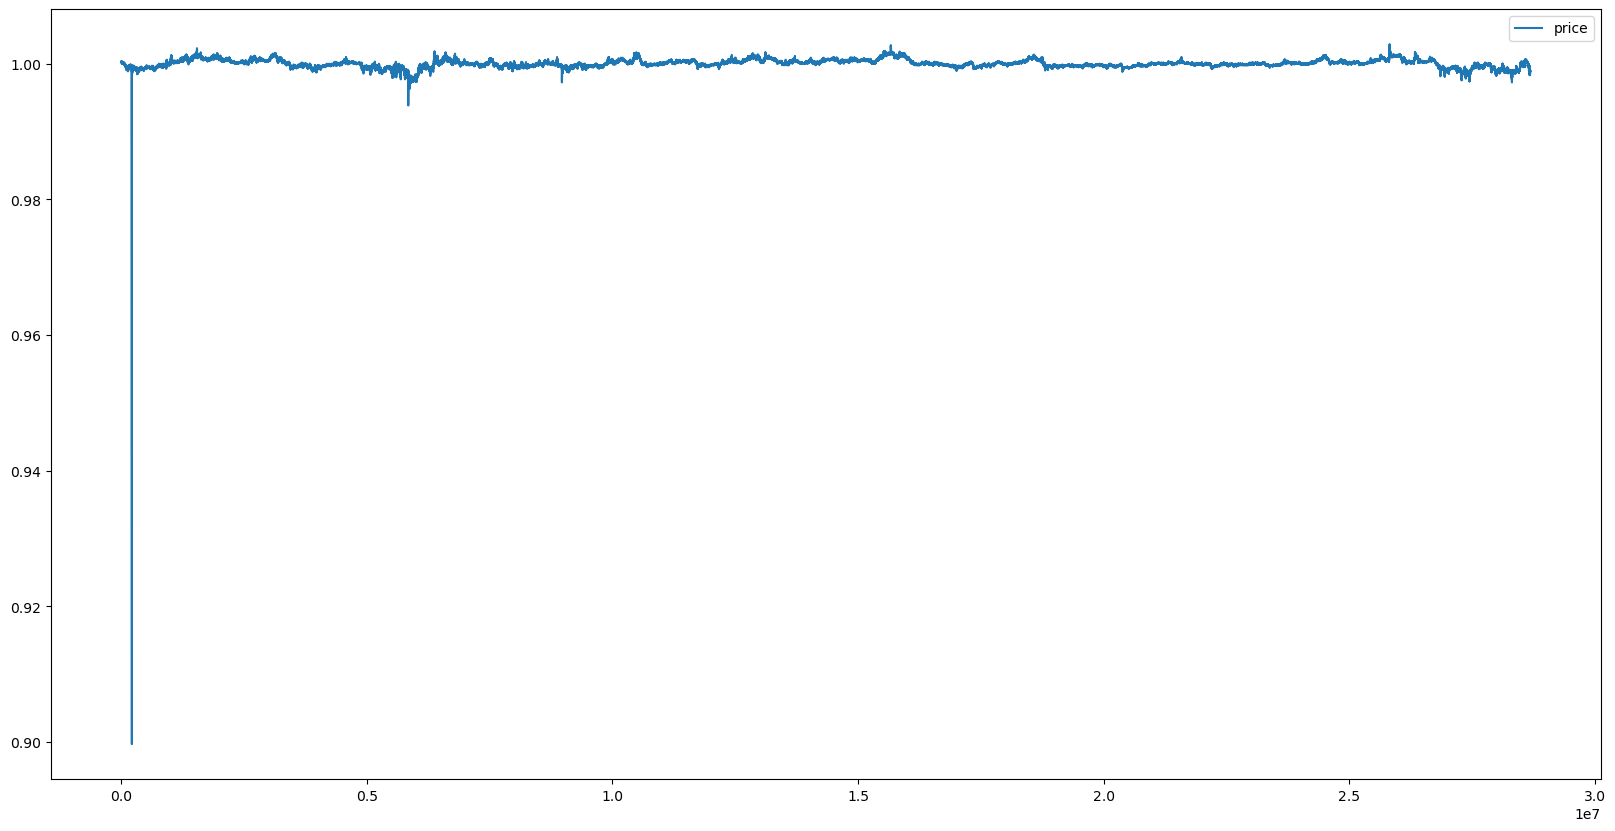

In [7]:
df.plot(y='price', figsize=(20, 10))